In [1]:
import numpy as np
import matplotlib.pyplot as plt

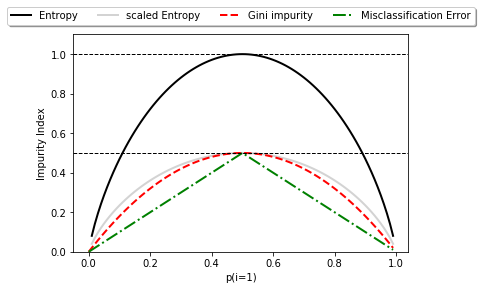

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

def error(p):
    return 1-np.max([p, 1-p])

x = np.arange(0,1,0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'scaled Entropy', 'Gini impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgrey', 'red', 'green']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw=2, color = c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol = 5, fancybox = True, shadow = True)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

The above picture just shows that entropy and gini gives similar results, and error on the other hand, si not so senstive to some changes.

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth = 4,
                              random_state=1)

In [4]:
# X_train, y_train
from sklearn import datasets
iris = datasets.load_iris()

X= iris.data[:, [2,3]]
y= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, test_idx = None, resolution = 0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[ y == cl, 0],
                    y = X[ y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c = '', edgecolor = 'black', alpha = 1.0,
                    linewidth=1, marker ='o', s=100, label = 'test set')

In [6]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

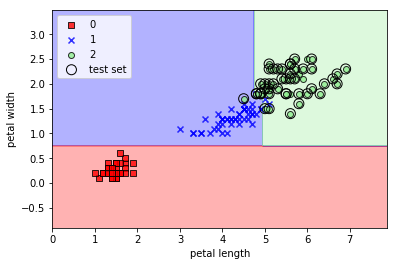

In [7]:
plot_decision_region(X, y, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

A nice feature in scikit-learn is that it allows us to export the desion tree as a **.dot** file after training, which we can visualize using the GraphViz program.
In addition to GraphViz, a Python library called **pydotplus** has capabilities similar to GraphViz and allows us to convert a .dot file into a decision tree image.

In [8]:
## brew install GraphViz
## pip3 install pydotplus

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,
                           filled=True, #adding color
                           rounded=True, #rounding the box edges
                           class_names=['Setosa', 'Versicolor', 'Virginica'], #show the name of the class label at each node
                           feature_names=['petal length', 'petal width'], #display the feature names
                           out_file=None) # the out_file=None prevents writing an intermediate tree.dot file to disk, instead, it directly assigns the dot data to a dot_data variable.


In [10]:
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

**Random Forests** can be considered as an **ensemble** of decision trees.

- Draw a random **Bootstrap** sample of size **n**, which is usually the size of the original training set.
- Randomly select **d features** without replacement, d = sqrt(m), m is the number of features in the original training dataset.
- build k trees in this way.
- majority vote of the decision trees

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini',
                                n_estimators = 25, # 25 decision trees
                                random_state=1,
                                n_jobs=2) # cores of the computer

In [16]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

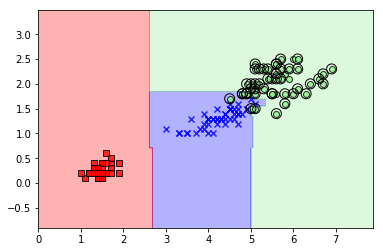

In [17]:
forest.fit(X_train, y_train)
plot_decision_region(X, y, classifier=forest, test_idx=range(105,150))
plt.show()